In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split

In [203]:
df = pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,262382.85
1,4272,3,3,2016,4.75,1,6,985260.85
2,3592,1,2,2016,3.63,0,9,777977.39
3,966,1,2,1977,2.73,1,8,229698.92
4,4926,2,1,1993,4.70,0,8,1041740.86
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.17,2,10,701494.00
996,3179,1,2,1999,2.98,1,10,683723.16
997,2606,4,2,1962,4.06,0,2,572024.02
998,4723,5,2,1950,1.93,0,7,964865.30


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [205]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [206]:
df.House_Price

0      262382.85
1      985260.85
2      777977.39
3      229698.92
4     1041740.86
         ...    
995    701494.00
996    683723.16
997    572024.02
998    964865.30
999    742599.25
Name: House_Price, Length: 1000, dtype: float64

In [207]:
df['House_Price'].describe()

count      1000.00
mean     618861.02
std      253568.06
min      111626.85
25%      401648.23
50%      628267.29
75%      827141.28
max     1108236.84
Name: House_Price, dtype: float64

In [208]:
# Define bins and labels
bins = [0, 200000, 500000, 1000000, 2000000]
labels = ['0-200k', '200k-500k', '500k-1M', '1M-2M',]

# Segment house prices into ranges
df['Price_Range'] = pd.cut(df['House_Price'], bins=bins, labels=labels)

print(df[['House_Price', 'Price_Range']])

     House_Price Price_Range
0      262382.85   200k-500k
1      985260.85     500k-1M
2      777977.39     500k-1M
3      229698.92   200k-500k
4     1041740.86       1M-2M
..           ...         ...
995    701494.00     500k-1M
996    683723.16     500k-1M
997    572024.02     500k-1M
998    964865.30     500k-1M
999    742599.25     500k-1M

[1000 rows x 2 columns]


In [209]:
range_counts = df['Price_Range'].value_counts().sort_index()
range_counts

Price_Range
0-200k        40
200k-500k    303
500k-1M      595
1M-2M         62
Name: count, dtype: int64

In [210]:
df['House_Price'] = df['House_Price'] / 1000
df.rename(columns={'House_Price': 'House_Price (in thousands)'}, inplace=True)
df['House_Price (in thousands)']

0      262.38
1      985.26
2      777.98
3      229.70
4     1041.74
        ...  
995    701.49
996    683.72
997    572.02
998    964.87
999    742.60
Name: House_Price (in thousands), Length: 1000, dtype: float64

Text(0.5, 1.0, 'Histogram of House Prices')

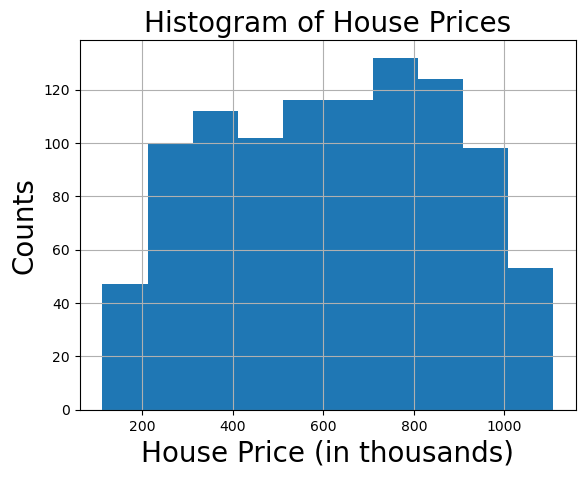

In [211]:
ax = df['House_Price (in thousands)'].hist()
ax.set_xlabel("House Price (in thousands)",fontsize=20)
ax.set_ylabel("Counts",fontsize=20)
ax.set_title("Histogram of House Prices",fontsize=20)

Text(0.5, 0, 'House Price')

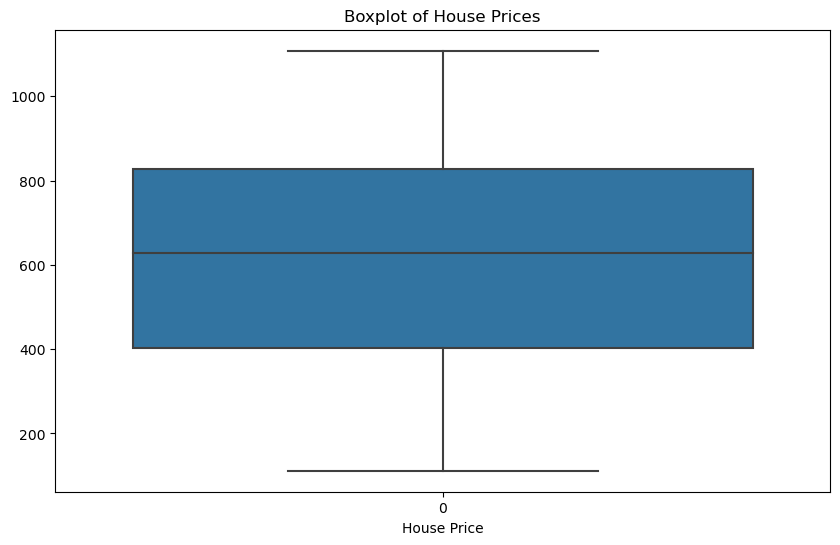

In [212]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['House_Price (in thousands)'])
plt.title('Boxplot of House Prices')
plt.xlabel('House Price')

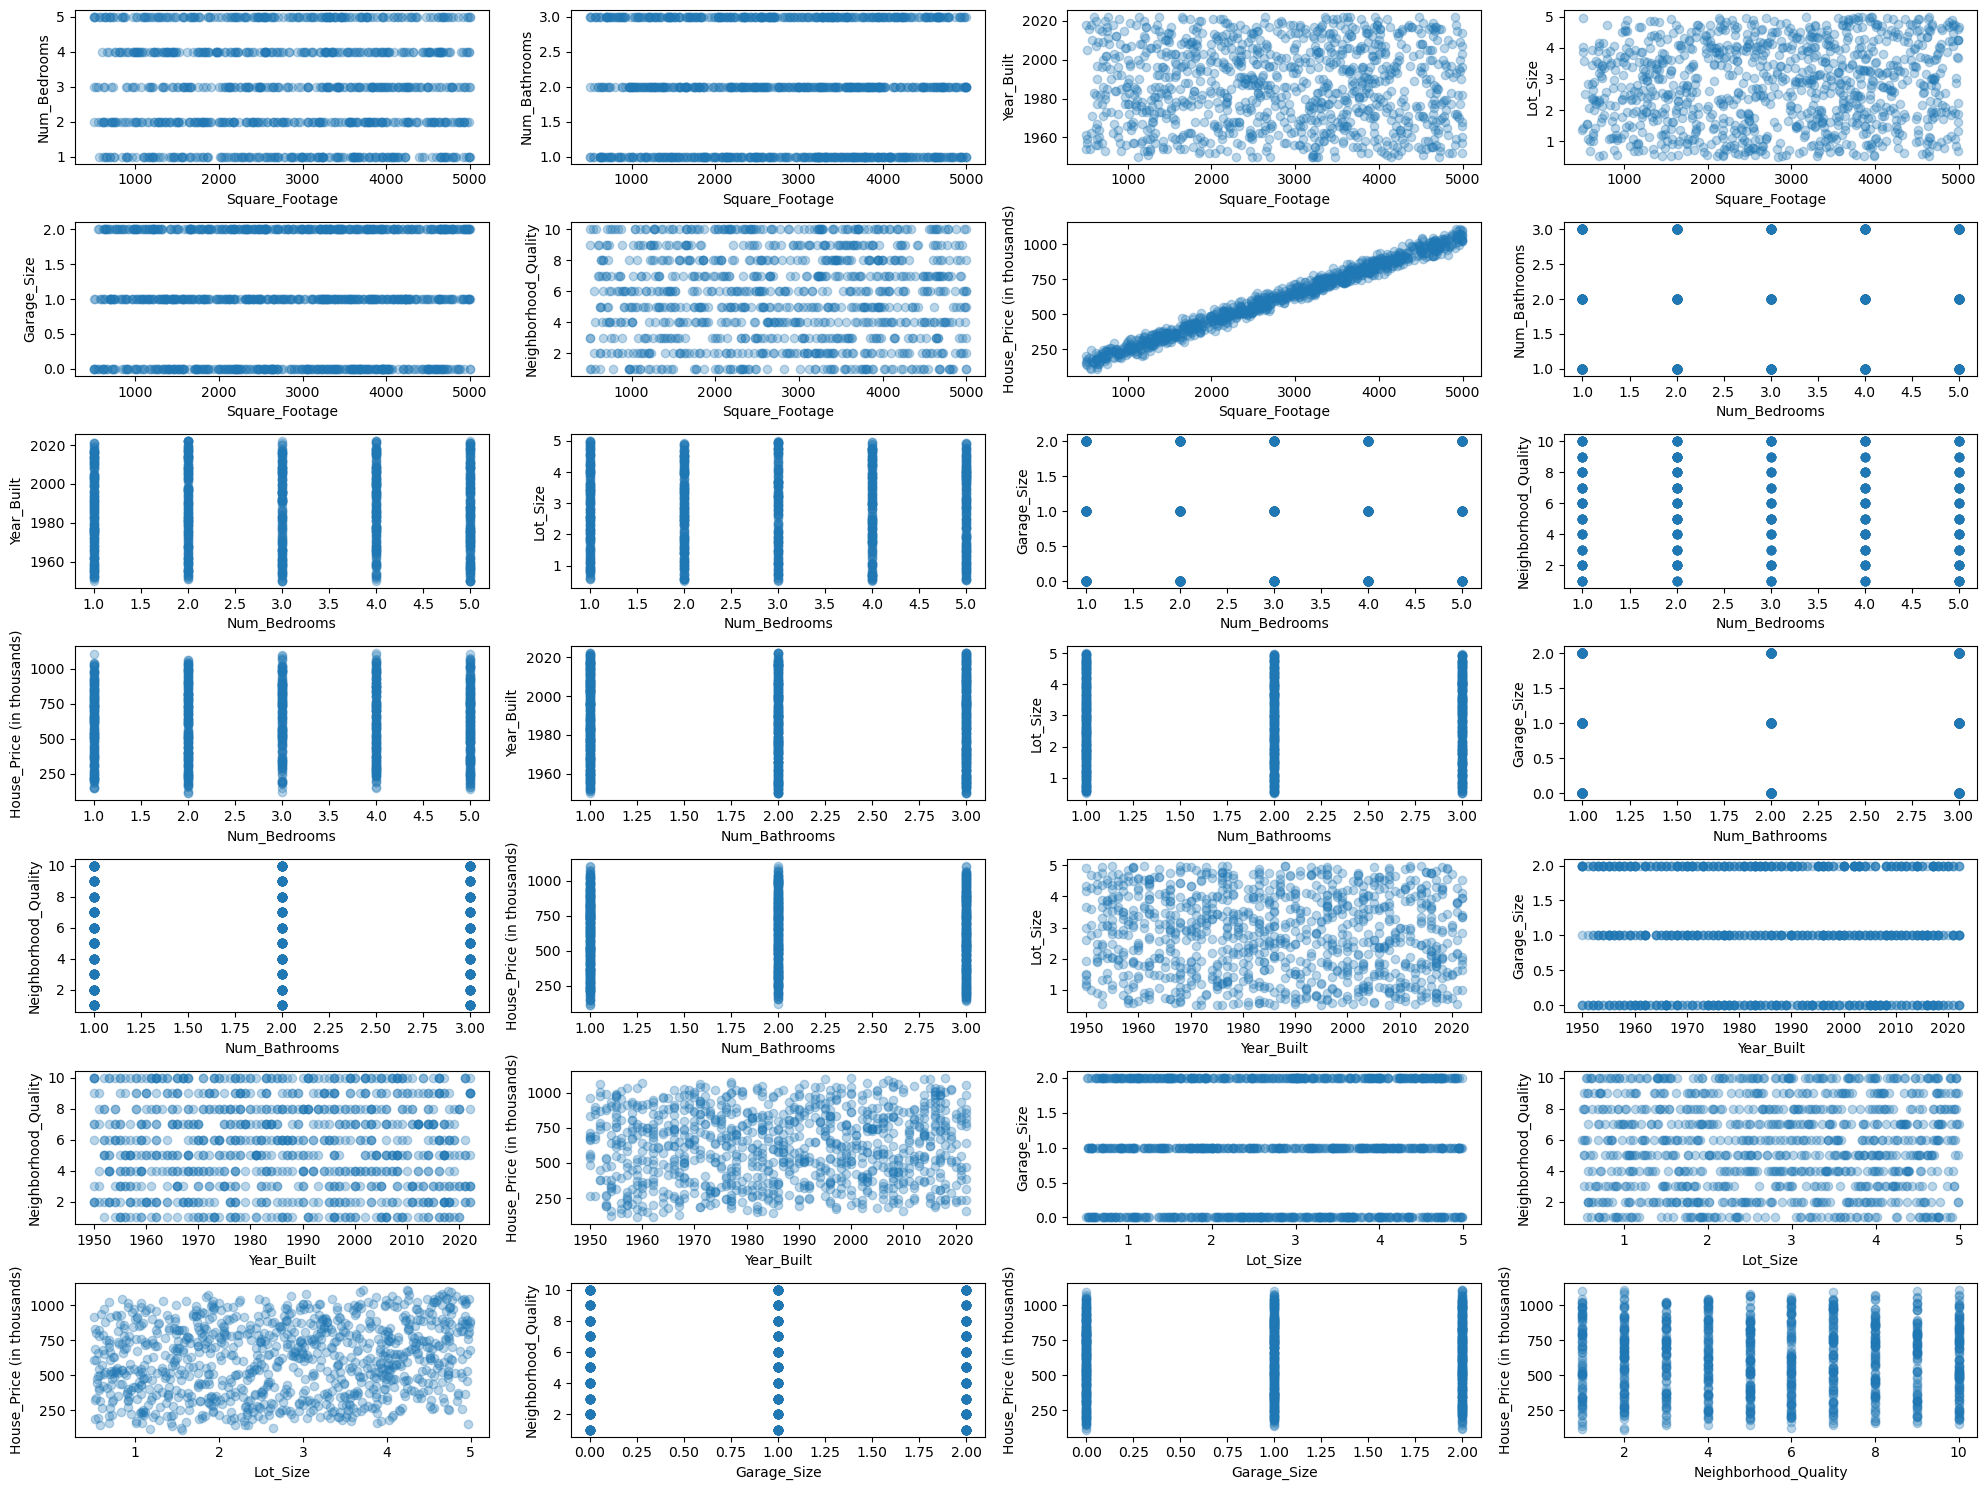

In [213]:
import itertools

# create a list of all columns that we are considering
features = [ 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price (in thousands)']

# create all combinations of considered columns
combinations = itertools.combinations(features, 2)

# create a figure and specify its size
fig = plt.figure(figsize=(20,15))

# go through all combinations and create one plot for each
figure_index = 1
for combination in combinations:
    # add a sub plot to the figure
    axs = fig.add_subplot(7,4,figure_index)
    
    # plot the feature combination
    axs.scatter(df[combination[0]], df[combination[1]], alpha=0.3)
    
    # set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

    
# show the plot
plt.tight_layout()
plt.show()

In [233]:
# separate features and target variable
price = df['House_Price (in thousands)']
features = df['Square_Footage'].values.reshape(-1, 1)

# create a train/test split
price_train, price_test, price_target_train, price_target_test = train_test_split(
    features, price, test_size=0.2, random_state=42)
print(f"Train features: {len(price_train)}, Train target: {len(price_target_train)}")
print(f"Test features: {len(price_test)}, Test target: {len(price_target_test)}")

Train features: 800, Train target: 800
Test features: 200, Test target: 200


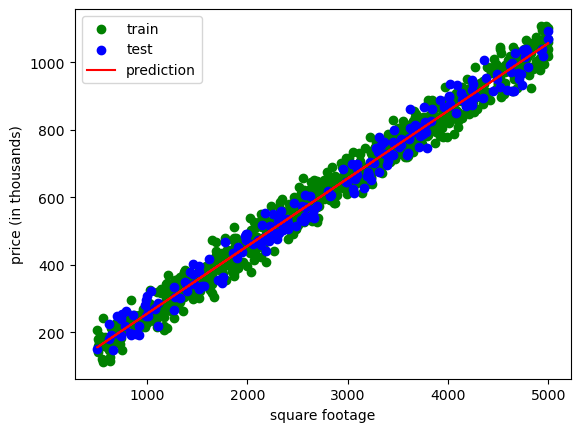

price = 0.2005568768700056*sq_footage + 54.22905859587672


In [243]:
from sklearn.linear_model import LinearRegression

# create and fit a linear regression
price_estimator = LinearRegression()
price_estimator.fit(price_train, price_target_train)

predictions_lin = price_estimator.predict(features)

# plot the original values
plt.scatter(price_train, price_target_train, c='green', label='train')
plt.scatter(price_test, price_target_test, c='blue', label='test')

# plot the predicted values
plt.plot(df['Square_Footage'], predictions_lin,c='red', label='prediction')

plt.xlabel('square footage')
plt.ylabel('price (in thousands)')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("price = {}*sq_footage + {}".format(price_estimator.coef_[0], price_estimator.intercept_))

In [245]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

predictions_lin = price_estimator.predict(price_test)

# Calculate evaluation metrics
mae = mean_absolute_error(price_target_test, predictions_lin)
mse = mean_squared_error(price_target_test, predictions_lin)
r2 = r2_score(price_target_test, predictions_lin)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE):", sqrt(mse))
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 27.1795330592607
Mean Squared Error (MSE): 1081.485546488955
Root Mean Squared Error (RMSE): 32.885947553460504
R-squared (R²): 0.9832220800154357


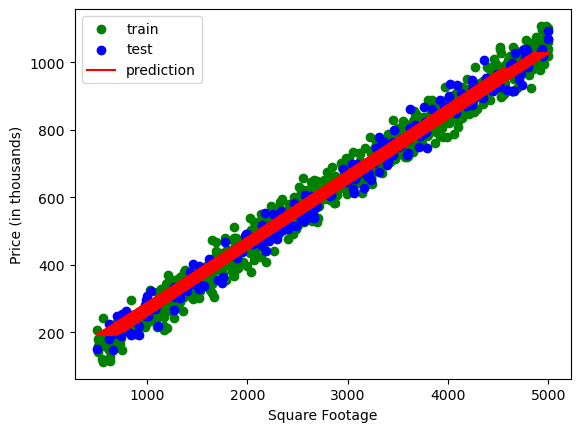

In [246]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(price_train, price_target_train)

plt.scatter(price_train, price_target_train, c='green', label='train')
plt.scatter(price_test, price_target_test, c='blue', label='test')

predicted_prices = neigh.predict(features)

# Plot the predictions
plt.plot(df['Square_Footage'], predicted_prices, c='red', label='prediction')
plt.xlabel('Square Footage')
plt.ylabel('Price (in thousands)')
plt.legend()
plt.show()

In [247]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
predictions = neigh.predict(price_test)

# Calculate evaluation metrics
mae = mean_absolute_error(price_target_test, predictions)
mse = mean_squared_error(price_target_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(price_target_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 28.481749071045524
Mean Squared Error (MSE): 1171.7871617736057
Root Mean Squared Error (RMSE): 34.2313768606173
R-squared (R²): 0.9818211613617917


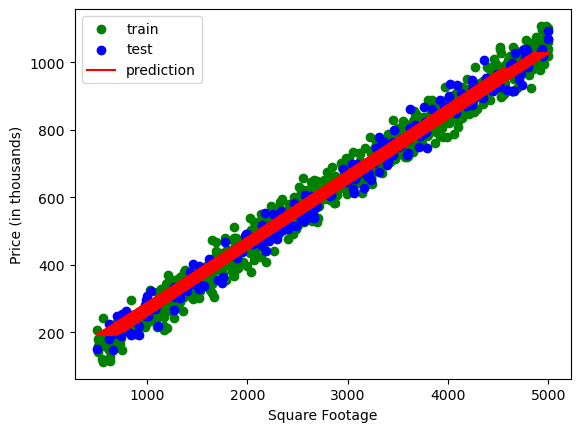

In [248]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(price_train, price_target_train)

plt.scatter(price_train, price_target_train, c='green', label='train')
plt.scatter(price_test, price_target_test, c='blue', label='test')

predicted_prices2 = neigh.predict(features)

# Plot the predictions
plt.plot(df['Square_Footage'], predicted_prices2, c='red', label='prediction')
plt.xlabel('Square Footage')
plt.ylabel('Price (in thousands)')
plt.legend()
plt.show()

In [249]:
# Predict on the test set
predictions = regressor.predict(price_test)

# Calculate evaluation metrics
mae = mean_absolute_error(price_target_test, predictions)
mse = mean_squared_error(price_target_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(price_target_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 36.67698341696432
Mean Squared Error (MSE): 2161.222641033436
Root Mean Squared Error (RMSE): 46.4889518168934
R-squared (R²): 0.9664712851153594
